# Matplotlib

    - http://matplotlib.org
    - http://seaborn.pydata.org
    
## 기본 그래프
    
    선(line), 막대(bar), 히스토그램, 산포도(scatter), 상자(box)
    
1) 질적 데이터
    
    요약방법 : 도표
    정리방법 : 도수 분포표, 분할표
    그래프 : 막대그래프(도수), 원 그래프, ...
    
2) 양적 데이터 

    요약방법 : 수치
    정리방법 : 산술평균, 중앙값, ...
    그래프 : 히스토그램, Boxplot, 시계열 그래프, 산포도(산점도)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

### 선 그래프

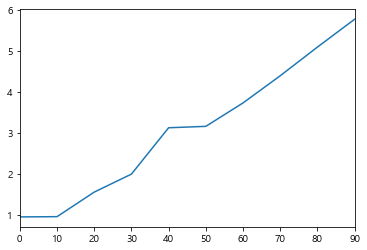

In [2]:
# 데이터 준비
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))    # cumsum : 값 누적해서 합해주는 함수 # 0부터 100까지 10씩 건너뛰기
s.plot()                                      # .plot() 을 붙이면 해당 함수에대한 값을 바로 시각화 해준다.
# s.plot.line()

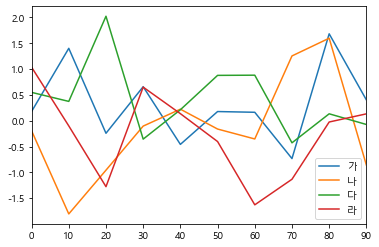

In [3]:
# 데이터 프레임 준비
df1 = pd.DataFrame(np.random.randn(10,4), columns=["가", "나", "다", "라"],
                  index=np.arange(0, 100, 10))                                  # 10행 4열 짜리 데이터, series 4개 합친거
df1
df1.plot()                                                                      # 시리즈 4개를 동시에 그린것과 동일한 형태

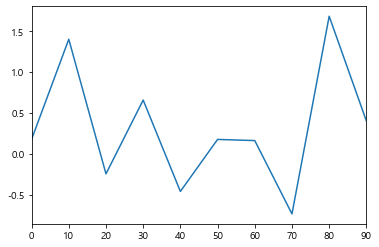

In [4]:
df1["가"].plot()            # '가'의 데이터를 보고싶을때

### 막대 그래프

    인덱스가 기준이 되기때문에 반드시 있어야한다.

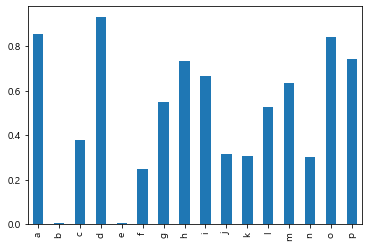

In [5]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))   # index = ["a", "b", ..] 하기 귀찮으니까
s2
s2.plot(kind="bar")
# s2.plot.bar()

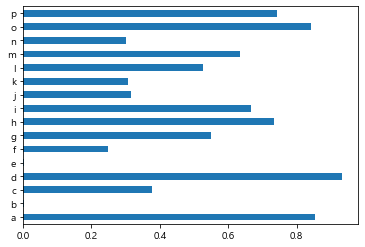

In [6]:
# s2.plot.barh()           # barh : 막대를 수평으로 보겠다
s2.plot(kind="barh")       # 위의 형식보다 이 형식을 더 자주 씀

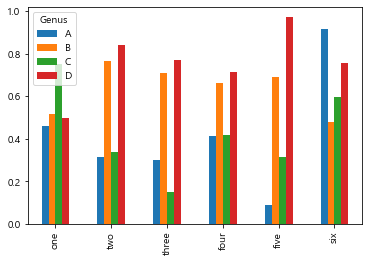

In [7]:
df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))   # 6행 4열 # pd.Index:범례의 제목?을 지정할수있어 가독성 좋음
df2
df2.plot(kind="bar")

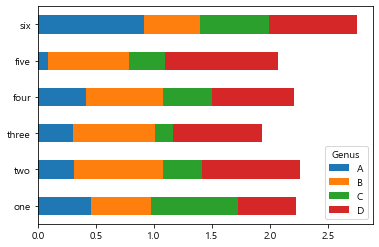

In [8]:
df2.plot(kind="barh", stacked=True)  # bar 수평으로 그리기 # stacked 쌓아서 나타내기 

### 히스토그램

    x변수가 가질 수 있는 값의 범위
    값만 필요하고 인덱스는 필요없다. (막대그래프와의 차이점)

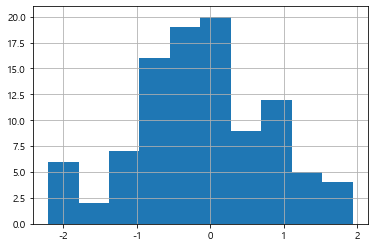

In [9]:
s3 = pd.Series(np.random.normal(0,1, size=100)) # 0부터 1사이에서 100개 뽑아주기
s3
s3.hist()  # hist : 히스토그램 그리기 # x좌표 : 난수 값의 범위, 좌표가 아님

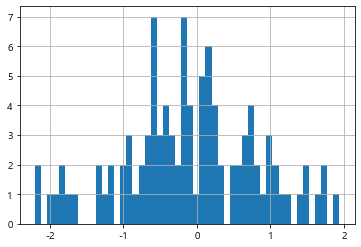

In [10]:
s3.hist(bins=50)  # 50개로 줄여서 보겠다

### 산포도(Scatter plot)

    두 변수의 관계를 확인
        - 양, 음

[[ 3.08222562 -1.66776318]
 [ 2.08017666 -4.69522194]
 [-0.53533372 -3.65975801]
 [ 1.27563078  2.76895377]
 [ 2.54027277  2.07549146]]


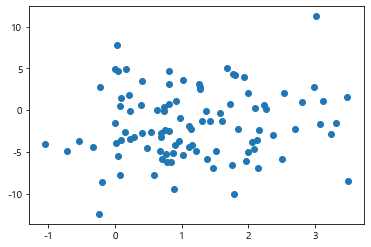

In [11]:
# 두개의 데이터 준비
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))

x = np.concatenate((x1, x2), axis=1)                      # axis=1 : 축은 행을 기준으로 묶어주겠다.
print(x[:5])

df3 = pd.DataFrame(x, columns=["x1", "x2"])
df3.head()

# df3.plot.scatter("x1", "x2")
plt.scatter(df3["x1"], df3["x2"])                         # scatter는 두개의 순서쌍으로 넘겨주기

### 상자 그래프(Box plot)

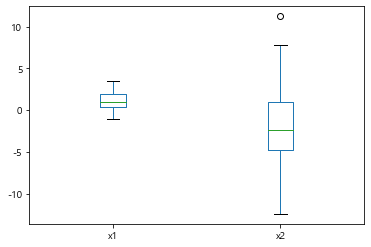

In [12]:
df3.plot.box() # 상자 : 데이터가 가장 많이 모여있는 위치 # 초록선 : 중앙값 # 검은선 : 최대 최소 # 70% 50% 25% 구분지어줌 # O는 이상치

## Matplotlib을 이용한 그래프 그리기

In [13]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

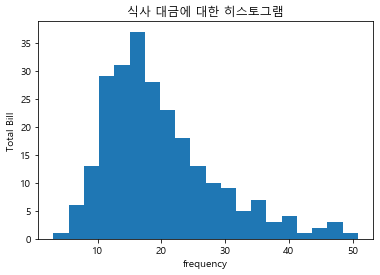

In [14]:
fig = plt.figure()                    # 그래프 그릴 땅을 미리 확보하겠다~~~
ax = fig.add_subplot(1, 1, 1)         # 그래프를 어떻게 그릴지 계획, 설계하기 # (1, 1, 1) : 1행 1열에 1개의 그래프를 그리겠다

# total_bill에 금액 분포를 확인
# ax.hist(tips["total_bill"])                   # 10-20 달러가 가장 많음을 볼수있다./ 이건 딱 10개만 보여줌
ax.hist(tips["total_bill"], bins=20)            # bins=20 : 20개의 데이터를 보여줘.. bins 개수 조정
ax.set_title("식사 대금에 대한 히스토그램")     # 타이틀 붙여주기
ax.set_xlabel("frequency")                      # x축과 y축에 레이블 붙이기
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

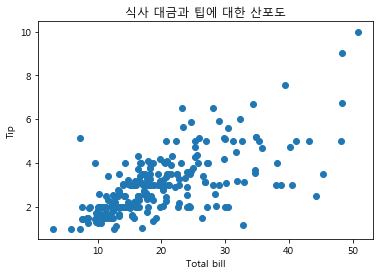

In [72]:
# Tip과 Total_bill의 관계를 알고 싶다.

fig = plt.figure()                    # 그래프 그릴 땅을 미리 확보하겠다~~~
ax = fig.add_subplot(1, 1, 1)         # 그래프를 어떻게 그릴지 계획, 설계하기 # (1, 1, 1) : 1행 1열에 1개의 그래프를 그리겠다

ax.scatter(tips["total_bill"], tips["tip"])      # x축, y축
ax.set_title("식사 대금과 팁에 대한 산포도")     # 타이틀 붙여주기
ax.set_xlabel("Total bill")                      # x축과 y축에 레이블 붙이기
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

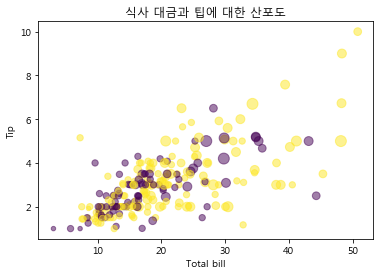

In [113]:
# 성별로 색상을 구별하기위한 함수 만들기

def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
    
tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

# 그래프 그리기
fig = plt.figure()                    # 그래프 그릴 땅을 미리 확보하겠다~~~
ax = fig.add_subplot(1, 1, 1)         # 그래프를 어떻게 그릴지 계획, 설계하기 # (1, 1, 1) : 1행 1열에 1개의 그래프를 그리겠다

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], s=tips["size"]*20, alpha=0.5) # c = color(남,녀), s = size(점의 크기 지정)(손님인원수), alpha = 투명도
ax.set_title("식사 대금과 팁에 대한 산포도")     # 타이틀 붙여주기
ax.set_xlabel("Total bill")                      # x축과 y축에 레이블 붙이기
ax.set_ylabel("Tip")

Text(0, 0.5, '')

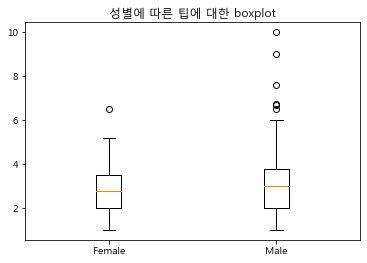

In [77]:
# 성별, Tip의 관계 

fig = plt.figure()                    
ax = fig.add_subplot(1, 1, 1)    

ax.boxplot([tips[tips["sex"] == "Female"]["tip"], tips[tips["sex"] == "Male"]["tip"]],
          labels=["Female", "Male"]) 
ax.set_title("성별에 따른 팁에 대한 boxplot")     
ax.set_xlabel("")                     
ax.set_ylabel("")

## Seaborn

In [78]:
tips = sns.load_dataset("tips")

Text(0, 0.5, 'Total Bill')

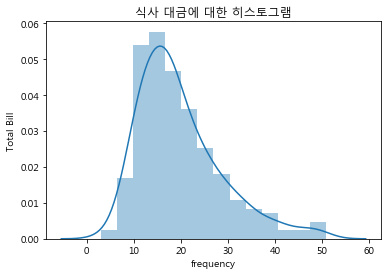

In [82]:
ax = plt.subplot()   # 그래프 어떻게 그릴지 설계
                     # http://seaborn.pydata.org/examples/distplot_options.html
    
ax = sns.distplot(tips["total_bill"])           # distplot : seaborn 내에 있는 그래프의 한 종류 
ax.set_title("식사 대금에 대한 히스토그램")     # 타이틀 붙여주기
ax.set_xlabel("frequency")                      # x축과 y축에 레이블 붙이기
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

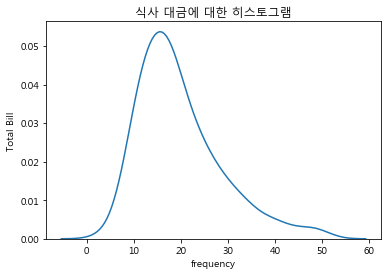

In [83]:
ax = plt.subplot()   # 그래프 어떻게 그릴지 설계
                     # http://seaborn.pydata.org/examples/distplot_options.html
    
ax = sns.distplot(tips["total_bill"], hist=False)           # hist: 선만 나타내기
ax.set_title("식사 대금에 대한 히스토그램")    
ax.set_xlabel("frequency")                      
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

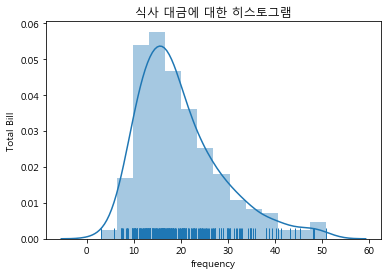

In [85]:
ax = plt.subplot()   # 그래프 어떻게 그릴지 설계
                     # http://seaborn.pydata.org/examples/distplot_options.html
    
ax = sns.distplot(tips["total_bill"], rug=True)           # rug : 밑에 카펫 깔아놓은것마냥..
ax.set_title("식사 대금에 대한 히스토그램")    
ax.set_xlabel("frequency")                      
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

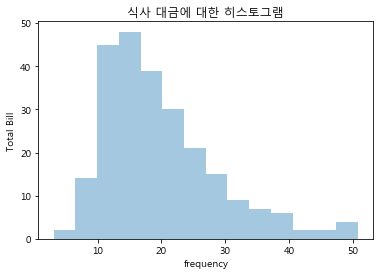

In [86]:
ax = plt.subplot()   # 그래프 어떻게 그릴지 설계
                     # http://seaborn.pydata.org/examples/distplot_options.html
    
ax = sns.distplot(tips["total_bill"], kde=False)           # kde(kernel density estimation) : 비모수 추정방법 : 선은 없고 막대그래프만 나타남
ax.set_title("식사 대금에 대한 히스토그램")    
ax.set_xlabel("frequency")                      
ax.set_ylabel("Total Bill")

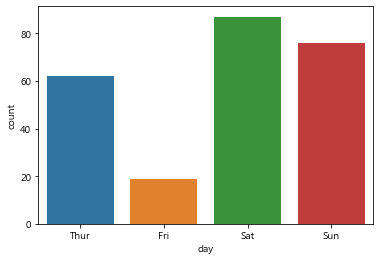

In [87]:
sns.countplot("day", data=tips) # 수량만 확인해주는 그래프 # day : 요일별로 구분해주기 

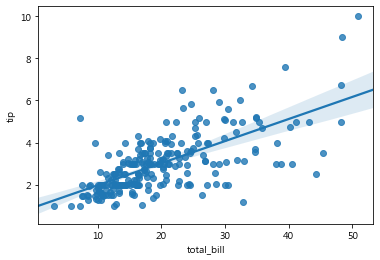

In [88]:
sns.regplot(x="total_bill", y="tip", data=tips)  # regplot 회귀분석 선 그려줌 분포에 대한 오차를 가장 중심적으로 알려줌

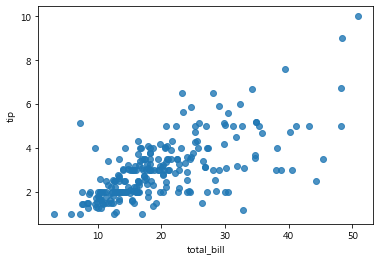

In [89]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False) # 선 없앨때

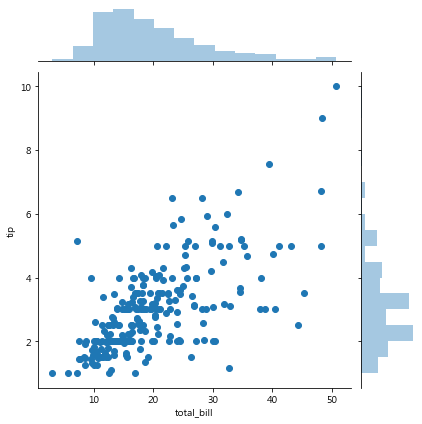

In [91]:
sns.jointplot(x="total_bill", y="tip", data=tips) # 여러개의 그래프 join해서 하나의 그래프로 그릴수있음 # 히스토그램, 산포도 합친거

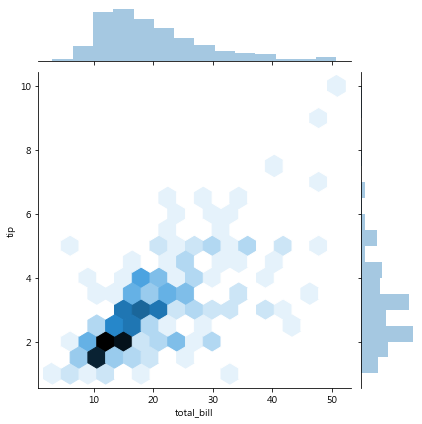

In [92]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")    # 육각형으로 분포 현황, 농도?, 까지 보여줌

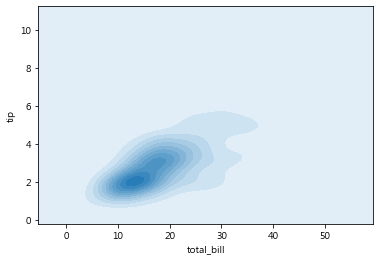

In [96]:
sns.kdeplot(data=tips["total_bill"], data2=tips["tip"], shade=True)   # shade : 배경 색상 넣어줌

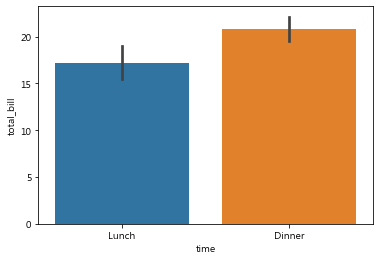

In [97]:
sns.barplot(x="time", y="total_bill", data=tips)

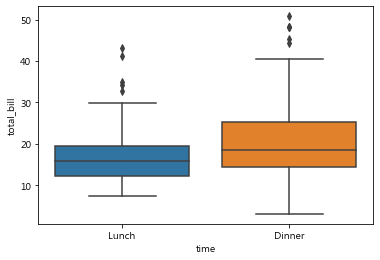

In [98]:
sns.boxplot(x="time", y="total_bill", data=tips)

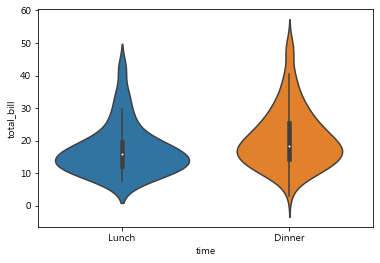

In [100]:
sns.violinplot(x="time", y="total_bill", data=tips)

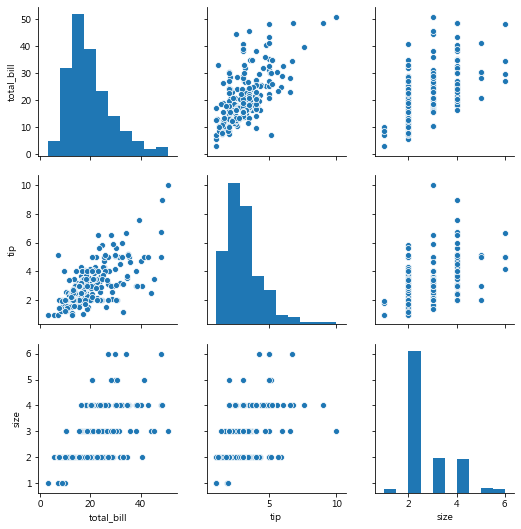

In [101]:
sns.pairplot(tips) # 모든 변수의 관계를 한번에 보여줌 # 양, 음의 관계를 알아볼수있음

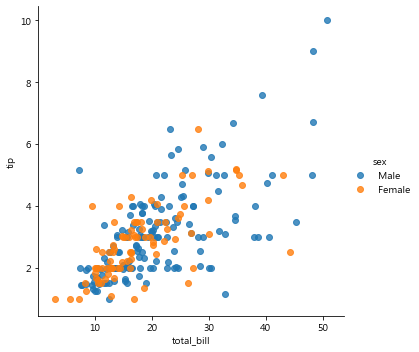

In [118]:
# 성별로 전체 식사대금과 팁의 관계를 확인
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex") # fit_reg : 선 없애기 # hue : 색

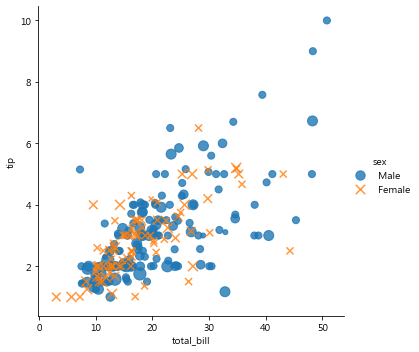

In [123]:
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex",
          scatter_kws={"s":tips["size"]*25}, markers=["o", "x"])   # 다양한 속성 지정 가능 , size : 손님 인원수에 따라 원의 크기 조정 가능
                                                                   # o와 x로 구분짓기

## 지도 시각화

    pip install folium 

In [124]:
# !pip install folium

In [2]:
import folium   # 지도의 위도 경도 알려줌

In [129]:
map = folium.Map(location=[37.4455696,126.9256642])  # 구글 맵 들어가면 html에 위도 경도 나타나있음
map = folium.Map(location=[37.4455696,126.9256642], zoom_start=15) # 줌 
map = folium.Map(location=[37.4455696,126.9256642], zoom_start=15, tiles="Stamen Toner") # tiles : 기본적인 윤곽선 위주로 확인
map

In [130]:
# 실업자 데이터 파일 불러오기
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [137]:
# jason 파일 위치 저장
state_geo = "data/map/folium_us-states.json"

map = folium.Map(location=[40, -98], zoom_start=4) # 대략 미국 위도 경도 잡아서 줌 해놓은값임
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id", columns=["State","Unemployment"], fill_color="YlGn")    
   # choropleth : 데이터랑 지도랑 연동해서 보여주는 함수/ data : 데이터자료/geo_data : 지도 정보/ key_on : 기준이 되는 값 입력 / YlGn 노랑,초록
map

In [12]:
# Marker

map = folium.Map(location=[37.5003302,127.0338983], zoom_start=15)
map

folium.Marker(location=[37.5003302,127.0338983], popup="역삼역",
             icon=folium.Icon(color="red", icon="star")).add_to(map)     #마커 만들기 / 팝업띠우기 / 아이콘 붙여넣기
map

folium.CircleMarker(location=[37.500579, 127.036442], popup="역삼역 주변",
             radius=50, color="#ff0000", fill_color="#ff0000").add_to(map)   # radius : 반경 설정 / .add_to : map에 뜨게 설정
map

# html로 저장하기
map.save("data/map/map.html")

## WordCloud

    pip install wordcloud

In [10]:
# !pip install wordcloud

In [24]:
from wordcloud import WordCloud, STOPWORDS  # stopwords 불용어들 나타냄

In [25]:
# 파일 불러오기
text = open("data/wordcloud/constitution.txt")
text = text.read()

In [27]:
# wc = WordCloud().generate(text)
wc = WordCloud(max_font_size=40, background_color="white").generate(text) # max_font_size : 폰트 크기 지정
wc
wc.words_  # words객체에 접근  # 제일 많이 등장한 단어를 1로 처리해서 모든 단어가 몇번 등장했는지 확률로 알려줌

plt.figure(figsize=(12, 12))   # 도화지 만들기
plt.imshow(wc, interpolation='bilinear')       #이미지를 그래프 처럼 끌어오는 함수 # interpolation : 이미지 보정해주는 효과
plt.axis("off") # 눈금 없애주기

NameError: name 'plt' is not defined

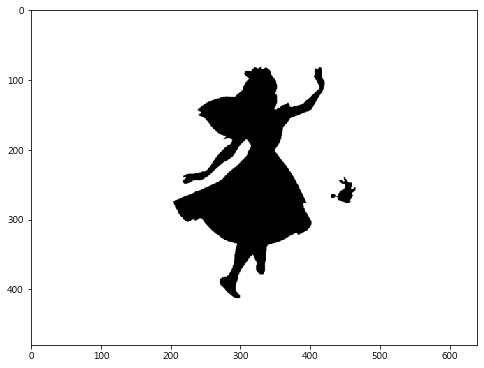

In [48]:
# 이미지 불러오기 위한 모듈 준비
from PIL import Image

alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))  # 배열로 해주기
alice_mask
alice_mask.shape  # (이미지 개수/ 흑백이냐 컬러냐)

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

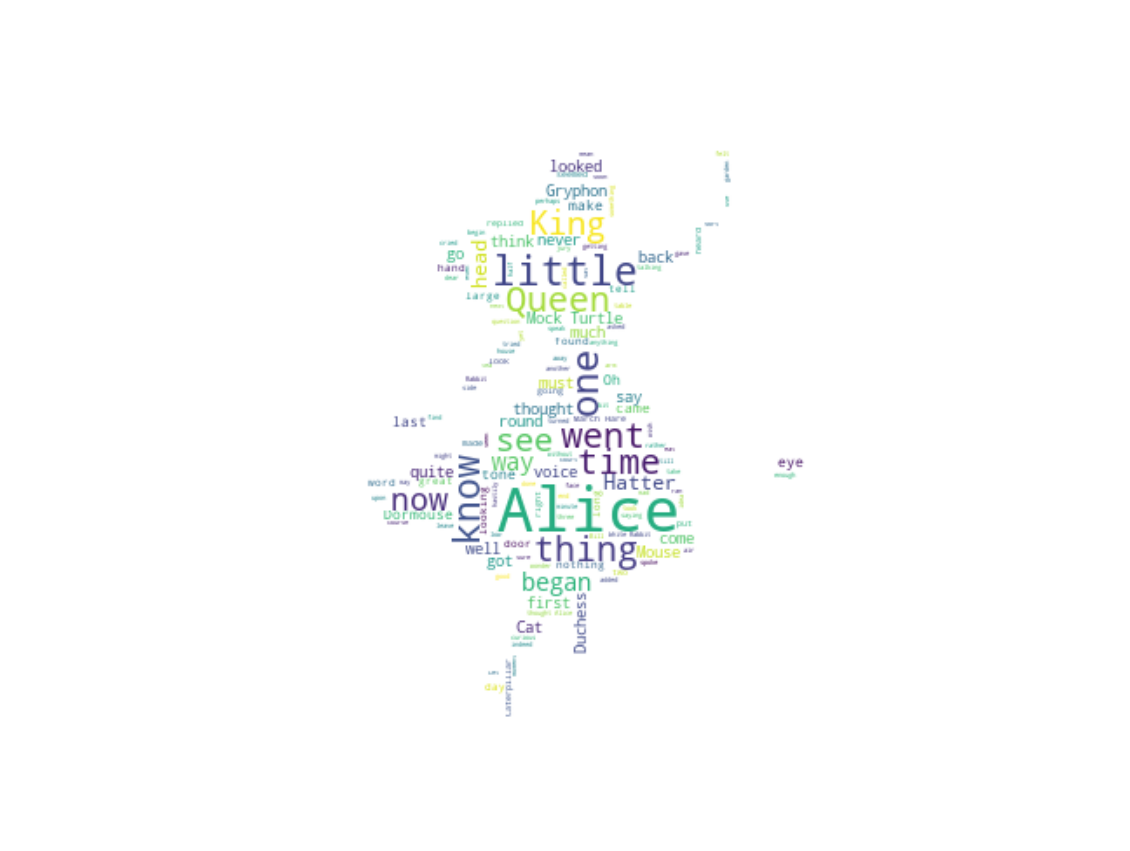

In [62]:
text = open("data/wordcloud/alice.txt").read()
stopwords = set(STOPWORDS)   #set : 중복 제거
stopwords.add("said")    # stopwords에 추가하기

wc = WordCloud(mask=alice_mask, stopwords=stopwords, background_color="white").generate(text) # mask: 마스크로 따로 사용하는 이미지 지정 여기에 단어 채우게 해줌/ 
wc.words_

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [52]:
STOPWORDS   # 불용어 들 나타냄 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
# http://konlpy.org 여기서 'jpype1'검색 'JPype1-0.7.1.-cp37-cp37m-win amd64.whl'다운받고 도스창 열기
# 설치해놓은 폴더에서 도스창 열어서 'pip install JPype1-0.7.1.-cp37-cp37m-win amd64.whl'
# 'pip install konlpy' 깔기

In [19]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk # 빈도수 조사

(-0.5, 399.5, 199.5, -0.5)

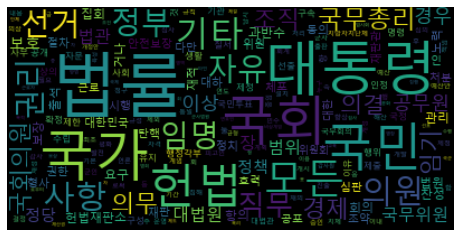

In [30]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

stop_words = ["제", "월", "일", "조", "수", "때", "그", "이", "바", "및", "안", "정", "위", "관"]

t = Okt()
ko_token = t.nouns(ko_text)   # 명사 뽑아내기
ko_token = [each_word for each_word in ko_token if each_word not in stop_words]  # stop_words 걸러내주기
len(ko_token) # 명사 개수 

ko = nltk.Text(ko_token)
ko.vocab()
data = ko.vocab().most_common(500)  # 가장 많이 등장한거 500개 뽑겠다

wc = WordCloud(font_path="C:\Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data)) # 폰트 지정해줘야함 #generate_from :빈도수로 처리했을 데이터를 넘겨주는 # 딕트 형식으로 넘겨줘야한다


plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [12]:
t = Okt()
ko_token = t.nouns("아버지가방에들어가신다") # 형태소만 뽑아냄
ko_token

['아버지', '가방']